In [1]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# mpl.rcParams['figure.dpi']= 300
sns.set()

In [2]:
# Load data
pd.set_option('display.max_columns', None) # display all columns
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-14/drugs.csv')
df.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,generic,biosimilar,conditional_approval,exceptional_circumstances,accelerated_assessment,orphan_medicine,marketing_authorisation_date,date_of_refusal_of_marketing_authorisation,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,False,False,False,False,False,True,2012-10-25,NaN,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,True,False,False,False,False,False,2018-07-26,NaN,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,NaN,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,False,False,False,True,False,True,2022-12-16,NaN,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,False,False,False,False,False,False,2021-11-12,NaN,Roche Registration GmbH,"Immune sera and immunoglobulins,",2021-11-11,2023-02-24,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12T16:30:00Z,2023-03-10T12:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,False,False,False,False,False,False,2015-01-14,NaN,Novartis Europharm Limited,Immunosuppressants,2014-11-20,2023-01-26,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07T11:59:00Z,2023-03-09T18:53:00Z,https://www.ema.europa.eu/en/medicines/human/E...


In [3]:
df.dtypes

category                                        object
medicine_name                                   object
therapeutic_area                                object
common_name                                     object
active_substance                                object
product_number                                   int64
patient_safety                                    bool
authorisation_status                            object
atc_code                                        object
additional_monitoring                             bool
generic                                           bool
biosimilar                                        bool
conditional_approval                              bool
exceptional_circumstances                         bool
accelerated_assessment                            bool
orphan_medicine                                   bool
marketing_authorisation_date                    object
date_of_refusal_of_marketing_authorisation      object
marketing_

In [4]:
# columns with missing values
df.columns[df.isna().any()].tolist()

['therapeutic_area',
 'common_name',
 'active_substance',
 'authorisation_status',
 'atc_code',
 'marketing_authorisation_date',
 'date_of_refusal_of_marketing_authorisation',
 'marketing_authorisation_holder_company_name',
 'pharmacotherapeutic_group',
 'date_of_opinion',
 'decision_date',
 'revision_number',
 'condition_indication',
 'species',
 'revision_date']

In [5]:
print(f"There are {len(df)} different drugs with {len(df.columns)} different features (columns) in the dataset.")

There are 1988 different drugs with 28 different features (columns) in the dataset.


In [6]:
df.category.value_counts()

human         1706
veterinary     282
Name: category, dtype: int64

In [7]:
df.medicine_name.nunique()

1976

In [8]:
df.active_substance.value_counts()

meloxicam                                                                      18
adalimumab                                                                     16
olanzapine                                                                     12
bevacizumab                                                                    12
pegfilgrastim                                                                  12
                                                                               ..
nivolumab, relatlimab                                                           1
delamanid                                                                       1
roxadustat                                                                      1
anifrolumab                                                                     1
diphtheria toxoid, hepatitis b, recombinant surface antigen, tetanus toxoid     1
Name: active_substance, Length: 1345, dtype: int64

We have to split the lists of string!

In [9]:
df.patient_safety.value_counts()

False    1977
True       11
Name: patient_safety, dtype: int64

In [10]:
df.authorisation_status.value_counts()

authorised    1573
withdrawn      357
refused         57
Name: authorisation_status, dtype: int64

In [11]:
df.additional_monitoring.value_counts()

False    1601
True      387
Name: additional_monitoring, dtype: int64

In [12]:
df.generic.value_counts()

False    1673
True      315
Name: generic, dtype: int64

In [13]:
df.biosimilar.value_counts()

False    1896
True       92
Name: biosimilar, dtype: int64

In [14]:
df.conditional_approval.value_counts()

False    1940
True       48
Name: conditional_approval, dtype: int64

In [15]:
df.exceptional_circumstances.value_counts()

False    1940
True       48
Name: exceptional_circumstances, dtype: int64

In [16]:
df.accelerated_assessment.value_counts()

False    1940
True       48
Name: accelerated_assessment, dtype: int64

In [17]:
df.orphan_medicine.value_counts()

False    1826
True      162
Name: orphan_medicine, dtype: int64

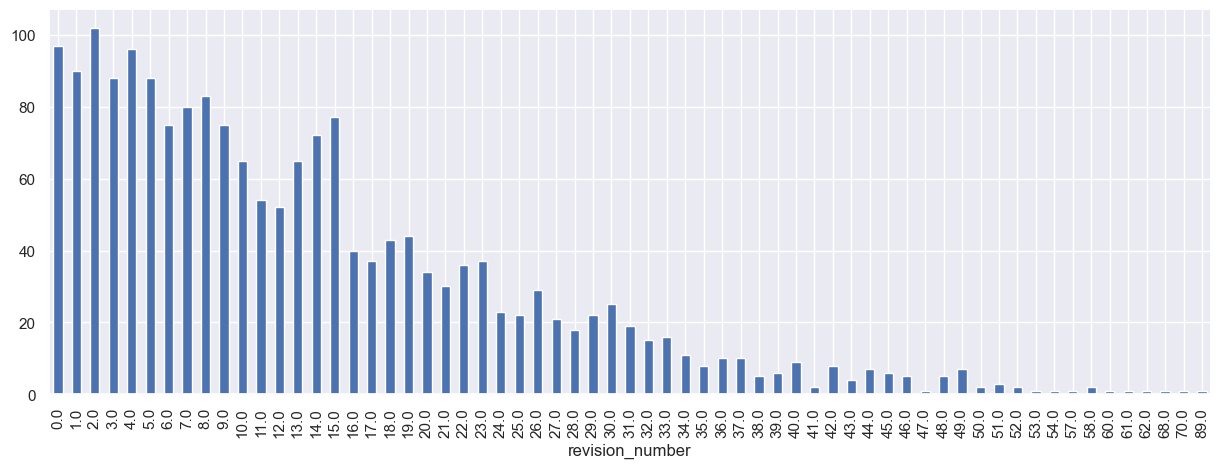

In [18]:
plt.figure(figsize=(15,5))
df.revision_number.value_counts().sort_index().plot.bar()
plt.xlabel('revision_number')
plt.show()